# Navier-Stokes equations in 2D (for an incompressible fluid)

By this point, we have all of the building blocks needed to solve the Navier-Stokes equations for an incompressible fluid in 2D.

The two governing equations in this case are the continuity equation (which encapsulates the conservation of mass of the fluid) and the Navier-Stokes equation (which encodes the conservation of momentum of the fluid). The continuity equation can be expressed as

\begin{align}
  \frac{\partial \rho}{\partial t} + \nabla\left(\rho \vec{u}\right) = 0,
\end{align}

where $\rho=\rho(\vec{x},t)$ is the mass density of the fluid and $\vec{u}=\vec{u}(\vec{x},t)$ is the velocity of the fluid. The Navier-Stokes or momentum equation takes the form 

\begin{align}
  \rho\left(\frac{\partial \vec{u}}{\partial t} + \left(\vec{u}\cdot\nabla\right)\vec{u}\right)
  = -\nabla\bar{p} + \mu\nabla^2\vec{u} + \frac{1}{3}\mu\nabla(\nabla\cdot\vec{u}) 
  + \rho\vec{g} + \vec{f}_\mathrm{ext}, 
\end{align}

where $\mu$ is the dynamic viscosity of the fluid and $\bar{p}$ is the thermodynamical pressure, related to the mechanical pressure and bulk viscosity $\zeta$ by

\begin{align}
  \bar{p} = p - \zeta\nabla\cdot\vec{u}.
\end{align}

The acceleration due to gravity is denoted by $\vec{g}$. The sum of external forces on the fluid (per unit volume) is given by $\vec{f}_\mathrm{ext}$. In what follows, we will be considering fluid flow in the absence of external forces, including gravity (i.e., 2D flow in the horizontal plane, so that gravitational forces play no role in the fluid motion). Hence we set $\vec{g}=0$ and $\vec{f}_\mathrm{ext}=0$ from here on.

Incompressible fluid implies $\rho(\vec{x},t)=\rho=\text{const}$, which combined with the continuity equation implies $\nabla\cdot\vec{u}=0$. With this, Navier-Stokes simplifes to 

\begin{align}
  \frac{\partial \vec{u}}{\partial t} + \left(\vec{u}\cdot\nabla\right)\vec{u}
  = -\frac{1}{\rho}\nabla{p} + \nu\nabla^2\vec{u},
\end{align}

where $\nu\equiv\mu/\rho$, which we will also assume is constant. 

Now we consider 2D fluid motion, letting $\vec{u}(\vec{x},t)=\vec{u}(x,y,t)=[u(x,y,t),v(x,y,t)]$. In terms of these components, the Navier-Stokes equation becomes

\begin{align}
  & \frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y}
  = -\frac{1}{\rho}\frac{\partial p}{\partial x} 
  + \nu\left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2}\right)
  \\
  & \frac{\partial v}{\partial t} + u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y}
  = -\frac{1}{\rho}\frac{\partial p}{\partial y} 
  + \nu\left(\frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2}\right),
\end{align}

where $u=u(x,y,t)$, $v=v(x,y,t)$, and $p=p(x,y,t)$. You should recognize many of the terms that appear here. These equations are nearly identical to the 2D Burger's equations that we have already solved (Step 8). The only new terms are the pressure gradients on the right-hand sides. These terms introduce a slight complication, stemming from the fact that we don't have an evolution equation for the pressure. So how can we evolve it?

Pressure is related to the density of the fluid through an equation of state. Evolution of the density and pressure are governed by the continuity equation. But for an incomressible fluid, the continuity equation yields the non-dynamical constraint, $\nabla\cdot\vec{u}=0$. So there must also be a constraint on the pressure. To obtain it, we take a divergence of the Navier-Stokes equation. If we do this analytically, after some simplifications this leads to the following Poisson equation for the pressure

\begin{align}
  \left(\frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2}\right)
  = -\rho\left(\left(\frac{\partial u}{\partial x}\right)^2
  + 2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}
  + \left(\frac{\partial v}{\partial y}\right)^2\right).
\end{align}

However, we cannot expect $\nabla\cdot\vec{u}=0$ to remain satisfied in the discrete world. Numerical errors will always creep in, violating the incompressibility constraint. There are two approaches for handling this. One approach is to enforce the constraint on the initial data once and for all, and then evolve those data freely (checking to what extent the constraint is still satisfied at the end). This is called free evolution. The second approach, called constrained evolution, is to enforce the constraint at each step in the evolution. We will take the second approach.

Let's return to the step where we take the divergence of Navier-Stokes and proceed a bit more cautiously. Taking a divergence yields

\begin{align}
  \rho\left(\frac{\partial}{\partial t}(\nabla\cdot\vec{u}) 
  + \nabla\cdot\left(\vec{u}\cdot\nabla\right)\vec{u}\right)
  = -\nabla^2(p - \zeta(\nabla\cdot\vec{u})) + \mu\nabla\cdot(\nabla^2\vec{u}) 
  + \frac{1}{3}\mu\nabla\cdot(\nabla(\nabla\cdot\vec{u})).
\end{align}

Here we do not assume that $\nabla\cdot\vec{u}$ is exactly zero. However when we discretize this equation, the higher-order derivatives will be more accurate than the rest of our code allows. So these terms can be neglected. Dropping all third derivatives and re-arranging yields

\begin{align}
  \nabla^2p
  = -\rho\left(\frac{\partial}{\partial t}(\nabla\cdot\vec{u}) 
  + \nabla\cdot\left(\vec{u}\cdot\nabla\right)\vec{u}\right).
\end{align}

We now discretize in time and re-write this as 

\begin{align}
  (\nabla\cdot\vec{u})^{n+1}
  = (\nabla\cdot\vec{u})^{n} 
  - \Delta{t}\left(\frac{1}{\rho}\nabla^2p^{n} 
  + \nabla\cdot\left(\vec{u}^{n}\cdot\nabla\right)\vec{u}^{n}\right).
\end{align}

To enforce the incompressibility constraint, we want $(\nabla\cdot\vec{u})^{n+1}=0$. In other words, at each step small constraint violations may be present. But to keep those violations from accumulating, or propagating, we set them to zero at the beginning of each step. At long last, this gives the constraint equation

\begin{align}
  \nabla^2p^{n} 
  = \rho\left(\frac{1}{\Delta{t}}(\nabla\cdot\vec{u})^{n}
  - \nabla\cdot\left(\vec{u}^{n}\cdot\nabla\right)\vec{u}^{n}\right).
\end{align}

Writing this in terms of components yields

\begin{align}
  \left(\frac{\partial^2 p^{n}}{\partial x^2} + \frac{\partial^2 p^{n}}{\partial y^2}\right)
  = \rho\left[
  \frac{1}{\Delta{t}}\left(\frac{\partial u^{n}}{\partial x} + \frac{\partial v^{n}}{\partial y}\right)
  - \left(\frac{\partial u^{n}}{\partial x}\right)^2
  - 2\frac{\partial u^{n}}{\partial y}\frac{\partial v^{n}}{\partial x}
  - \left(\frac{\partial v^{n}}{\partial y}\right)^2
  - u^{n}\frac{\partial^2 u^{n}}{\partial x^2} 
  - u^{n}\frac{\partial^2 v^{n}}{\partial x \partial y}
  - v^{n}\frac{\partial^2 v^{n}}{\partial x \partial y} 
  - v^{n}\frac{\partial^2 v^{n}}{\partial y^2}
  \right].
\end{align}

Ensuring that this equation is satisfied will enforce $\nabla\cdot\vec{u}^{n+1}=0$ at every new time step. 

In sum, we need to evolve the two momentum equations (the Navier-Stokes equations) while simultaneously satisfying the Poisson constraint equation for the pressure. Before solving, we also need initial conditions and boudary conditions, which we turn to now.

## Cavity flow in 2D

Here we will consider flow in a 2D cavity that is exposed on one side. We take the cavity to be rectangular, with edges at $x=0$, $x=L_{x}$, $y=0$ and $y=L_{y}$. We will take the boundary at $y=L_{y}$ to be open. Think of a very thin aquarium tank whose topside is exposed to the air. We are going to neglect any flow out of the vertical plane (for that, we would need 3D equations). We are also going to ignore gravity.

The situation we want to solve for is when the fluid at the upper exposed boundary is given a constant horizontal flow. (For example, a constant wind blowing across the surface of the fluid.) 

The initial and boundary conditions that we will use to model this situation are the following. Initially, all fields are set to zero

\begin{align}
  & u(x,y,0) = 0 \\
  & v(x,y,0) = 0 \\
  & p(x,y,0) = 0
\end{align}

The boundary conditions for pressure are

\begin{align}
  & \frac{\partial p}{\partial x}(0,y,t) = 0 \\
  & \frac{\partial p}{\partial x}(L_{x},y,t) = 0 \\
  & \frac{\partial p}{\partial x}(x,0,t) = 0 \\
  & p(x,L_{y},t) = 0.
\end{align}

The boundary conditions for the velocity field are

\begin{align}
  & u(0,y,t) = v(0,y,t) = 0 \\
  & u(L_{x},y,t) = v(L_{x},y,t) = 0 \\
  & u(x,0,t) = v(x,0,t) = 0 \\
  & u(x,L_{y},t) = 1 \quad,\quad v(x,L_{y},t) = 0.
\end{align}

We solve the above Navier-Stokes equations along with the pressure constraint, subject to these initial conditions and boundary conditions. Next we turn to the task of discretizing the system of equations using finite differences.

## Discretization and evolution scheme

As before, we take the boundary to be a 2D rectangular grid with dimensions $L_x$ and $L_y$. 

We treat the evolution equations (momentum equations) as we did for Burger's equation in 2D. We treat time derivatives with forward differences, advection terms with backward differences, and all other spatial derivatives with centered differences. This yields the difference equations

\begin{align}
  & u^{n+1}_{i,j} = u^{n}_{i,j} 
  - \frac{\Delta{t}}{\Delta{x}}u^{n}_{i,j}\left(u^{n}_{i,j} - u^{n}_{i-1,j}\right)
  - \frac{\Delta{t}}{\Delta{y}}v^{n}_{i,j}\left(u^{n}_{i,j} - u^{n}_{i,j-1}\right)
  - \frac{\Delta{t}}{2\rho\Delta{x}}\left(p^{n}_{i+1,j} - p^{n}_{i-1,j}\right)
  \\ & \quad\quad\quad
  + \frac{\nu\Delta{t}}{(\Delta{x})^2}\left(u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}\right)
  + \frac{\nu\Delta{t}}{(\Delta{y})^2}\left(u^{n}_{i,j+1} - 2u^{n}_{i,j} + u^{n}_{i,j-1}\right)
\end{align}

\begin{align}
  & v^{n+1}_{i,j} = v^{n}_{i,j} 
  - \frac{\Delta{t}}{\Delta{x}}u^{n}_{i,j}\left(v^{n}_{i,j} - v^{n}_{i-1,j}\right)
  - \frac{\Delta{t}}{\Delta{y}}v^{n}_{i,j}\left(v^{n}_{i,j} - v^{n}_{i,j-1}\right)
  - \frac{\Delta{t}}{2\rho\Delta{y}}\left(p^{n}_{i+1,j} - p^{n}_{i,j-1}\right)
  \\ & \quad\quad\quad
  + \frac{\nu\Delta{t}}{(\Delta{x})^2}\left(v^{n}_{i+1,j} - 2v^{n}_{i,j} + v^{n}_{i-1,j}\right)
  + \frac{\nu\Delta{t}}{(\Delta{y})^2}\left(v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1}\right).
\end{align}

We treat the constraint equation as we did for Poisson's equation. We discretize the spatial derivatives using centered finite differences to setup the relaxation equation

\begin{align}
  p^{[r+1]}_{i,j} =
  \frac{(\Delta{y})^2\left(p^{[r]}_{i+1,j} + p^{[r]}_{i-1,j}\right)
  + (\Delta{x})^2\left(p^{[r]}_{i,j+1} + p^{[r]}_{i,j-1}\right)
  - (\Delta{x})^2(\Delta{y})^2 s_{i,j}}{2\left((\Delta{x})^2 + (\Delta{y})^2\right)},
\end{align}

where the source function is given by 

\begin{align}
  s_{i,j} = 
  &\rho\left[
  \frac{1}{2\Delta{t}\Delta{x}}(u^{n}_{i+1,j} - u^{n}_{i-1,j})
  +\frac{1}{2\Delta{t}\Delta{y}}(v^{n}_{i,j+1} - v^{n}_{i,j-1})\right.
  \\
  &\quad
  -\frac{1}{4(\Delta{x})^2}(u^{n}_{i+1,j} - u^{n}_{i-1,j})^2
  - \frac{1}{2\Delta{x}\Delta{y}}(u^{n}_{i,j+1} - u^{n}_{i,j-1})(v^{n}_{i+1,j} - v^{n}_{i-1,j})
  - \frac{1}{4(\Delta{y})^2}(v^{n}_{i,j+1} - v^{n}_{i,j-1})^2
  \\
  &\quad
  - \frac{1}{(\Delta{x})^2}u^{n}_{i,j}\left(u^{n}_{i+1,j} - 2u^{n}_{i,j} + u^{n}_{i-1,j}\right)
  - \frac{1}{4\Delta{x}\Delta{y}}u^{n}_{i,j}
    \left(u^{n}_{i+1,j+1} - u^{n}_{i+1,j-1} - u^{n}_{i-1,j+1} + u^{n}_{i-1,j-1}\right)
  \\
  &\quad\left.
  - \frac{1}{4\Delta{x}\Delta{y}}v^{n}_{i,j}
    \left(v^{n}_{i+1,j+1} - v^{n}_{i+1,j-1} - v^{n}_{i-1,j+1} + v^{n}_{i-1,j-1}\right)
  - \frac{1}{(\Delta{y})^2}v^{n}_{i,j}\left(v^{n}_{i,j+1} - 2v^{n}_{i,j} + v^{n}_{i,j-1}\right)
  \right].
\end{align}

The idea to solve is the following. Use the initial data for $u$ and $v$ to construct the source function $s$. Then solve the pressure constraint equation to obtain $p$. Then feed this into the evolution equation (Navier-Stokes equations) and solve for $u$ and $v$ at the next time step. Repeat for as many time steps as desired. Now let's code it up!

(The below is lengthy. To help with organization, several subroutines have been introduced. To decipher the code, it will help to first look at the "main" routine, which here is called "navstokes2D". This appears toward the bottom of the page.)

In [1]:
import numpy as np
import time
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

In [2]:
# calculate rhs for pressure constraint
def poisson_rhs(un, vn, dx, dy, dt, rho):

    # print message (debugging)
    #print('re-calculating rhs for pressure equation...')

    # initialize arrays
    dudx = np.zeros_like(un)
    dvdx = np.zeros_like(vn)
    dudy = np.zeros_like(un)
    dvdy = np.zeros_like(vn)
    ududxx = np.zeros_like(un)
    vdudxy = np.zeros_like(vn)
    udvdyx = np.zeros_like(un)
    vdvdyy = np.zeros_like(vn)

    # interior points
    dudx[1:-1, 1:-1] = (un[2:, 1:-1] - un[0:-2, 1:-1])/(2*dx) #centered x difference
    dvdx[1:-1, 1:-1] = (vn[2:, 1:-1] - vn[0:-2, 1:-1])/(2*dx) #centered x difference
    dudy[1:-1, 1:-1] = (un[1:-1, 2:] - un[1:-1, 0:-2])/(2*dy) #centered y difference
    dvdy[1:-1, 1:-1] = (vn[1:-1, 2:] - vn[1:-1, 0:-2])/(2*dy) #centered y difference

    ududxx[1:-1,1:-1] = un[1:-1,1:-1]*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[0:-2,1:-1])/(dx*dx) #centered x difference
    vdvdyy[1:-1,1:-1] = vn[1:-1,1:-1]*(vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[0:-2,1:-1])/(dy*dy) #centered x difference
    vdudxy[1:-1,1:-1] = vn[1:-1,1:-1]*(un[2:,2:] - un[2:,0:-2] - un[0:-2,2:] + un[0:-2,0:-2])/(4*dx*dy) #centered differences
    udvdyx[1:-1,1:-1] = un[1:-1,1:-1]*(vn[2:,2:] - vn[2:,0:-2] - vn[0:-2,2:] + vn[0:-2,0:-2])/(4*dx*dy) #centered differences

#    # boundary edge x=0
#    dudx[0, 1:-1] = (un[1, 1:-1] - un[0, 1:-1])/dx #forward x difference
#    dvdx[0, 1:-1] = (vn[1, 1:-1] - vn[0, 1:-1])/dx #forward x difference
#    dudy[0, 1:-1] = 0.5*(un[0, 2:] - un[0, 0:-2])/dy #centered y difference
#    dvdy[0, 1:-1] = 0.5*(vn[0, 2:] - vn[0, 0:-2])/dy #centered y difference

#    # boundary edge x=Lx
#    dudx[-1, 1:-1] = (un[-2, 1:-1] - un[-1, 1:-1])/dx #forward x difference
#    dvdx[-1, 1:-1] = (vn[-2, 1:-1] - vn[-1, 1:-1])/dx #forward x difference
#    dudy[-1, 1:-1] = 0.5*(un[-1, 2:] - un[-1, 0:-2])/dy #centered y difference
#    dvdy[-1, 1:-1] = 0.5*(vn[-1, 2:] - vn[-1, 0:-2])/dy #centered y difference

#    # boundary edge y=0
#    dudx[1:-1, 0] = 0.5*(un[2:, 0] - un[0:-2, 0])/dx #centered x difference
#    dvdx[1:-1, 0] = 0.5*(vn[2:, 0] - vn[0:-2, 0])/dx #centered x difference
#    dudy[1:-1, 0] = (un[1:-1, 1] - un[1:-1, 0])/dy #forward y difference
#    dvdy[1:-1, 0] = (vn[1:-1, 1] - vn[1:-1, 0])/dy #forward y difference

#    # boundary edge y=Ly
#    dudx[1:-1, -1] = 0.5*(un[2:, -1] - un[0:-2, -1])/dx #centered x difference
#    dvdx[1:-1, -1] = 0.5*(vn[2:, -1] - vn[0:-2, -1])/dx #centered x difference
#    dudy[1:-1, -1] = (un[1:-1, -2] - un[1:-1, -1])/dy #forward y difference
#    dvdy[1:-1, -1] = (vn[1:-1, -2] - vn[1:-1, -1])/dy #forward y difference

#    # boundary corner x=0, y=0
#    dudx[0, 0] = (un[1, 0] - un[0, 0])/dx #forward x difference
#    dvdx[0, 0] = (vn[1, 0] - vn[0, 0])/dx #forward x difference
#    dudy[0, 0] = (un[0, 1] - un[0, 0])/dy #forward y difference
#    dvdy[0, 0] = (vn[0, 1] - vn[0, 0])/dy #forward y difference
#    # boundary corner x=0, y=Ly
#    dudx[0, -1] = (un[1, -1] - un[0, -1])/dx #forward x difference
#    dvdx[0, -1] = (vn[1, -1] - vn[0, -1])/dx #forward x difference
#    dudy[0, -1] = (un[0, -2] - un[0, -1])/dy #forward y difference
#    dvdy[0, -1] = (vn[0, -2] - vn[0, -1])/dy #forward y difference
#    # boundary corner x=Lx, y=0
#    dudx[-1, 0] = (un[-2, 0] - un[-1, 0])/dx #forward x difference
#    dvdx[-1, 0] = (vn[-2, 0] - vn[-1, 0])/dx #forward x difference
#    dudy[-1, 0] = (un[-1, 1] - un[-1, 0])/dy #forward y difference
#    dvdy[-1, 0] = (vn[-1, 1] - vn[-1, 0])/dy #forward y difference
#    # boundary corner x=Lx, y=Ly
#    dudx[-1, -1] = (un[-2, -1] - un[-1, -1])/dx #forward x difference
#    dvdx[-1, -1] = (vn[-2, -1] - vn[-1, -1])/dx #forward x difference
#    dudy[-1, -1] = (un[-1, -2] - un[-1, -1])/dy #forward y difference
#    dvdy[-1, -1] = (vn[-1, -2] - vn[-1, -1])/dy #forward y difference

    # return source function
    return rho*((dudx + dvdy)/dt - (dudx*dudx + 2*dudy*dvdx + dvdy*dvdy) - ududxx - vdudxy - udvdyx - vdvdyy)

In [3]:
# poisson boundary conditions at x=0
def poisson_bcs_x0(p):
    
    #bn = 0*p[0,:] # dirichlet, p=0
    bn = p[1,:] # neumann, dp/dx=0
    
    return bn

In [4]:
# poisson boundary conditions at x=Lx
def poisson_bcs_xL(p):
    
    #bn = 0*p[-1,:] # dirichlet, p=0
    bn = p[-2,:] # neumann, dp/dx=0
    
    return bn

In [5]:
# poisson boundary conditions at y=0
def poisson_bcs_y0(p):
    
    #bn = 0*pn[:,0] # dirichlet, p=0
    bn = p[:,1] # neumann, dp/dy=0
    
    return bn

In [6]:
# poisson boundary conditions at y=Ly
def poisson_bcs_yL(p):
    
    bn = 0*p[:,-1] # dirichlet, p=0
    #bn = p[:,-2] # neumann, dp/dy=0
    
    return bn

In [7]:
# solve poisson eqn
def poisson_solve(p, rhs, dx, dy, omega, tol, maxiter):
    """
    Solve the Poisson equation in 2D using SOR method.
    
    INPUT:
    p = pressure grid function at previous iteration
    rhs = source grid function
    dx = grid spacing in the x direction
    dy = grid spacing in the y direction
    omega = over-relaxation parameter
    tol = desired tolerance of solution
    maxiter = maximum allowed number of iterations
    
    OUTPUT:
    updated pressure
    """

    # print message (debugging)
    #print('solving pressure contraint equation...')

    # get number of grid points along each axis 
    nx = len(p[:,0])
    ny = len(p[0,:])
   
    # grid spacing factors
    cx = dx*dx/(dx*dx + dy*dy)
    cy = dy*dy/(dx*dx + dy*dy)

    # sor iteration
    for r in range(maxiter):
        
        # print iteration number (debugging)
        #print('  iteration',r)
        
        # copy solution from previous iteration
        pn = np.copy(p)
        
        # update solution at interior points
        p[1:-1,1:-1] = (1 - omega)*pn[1:-1,1:-1] \
        + omega*0.5*cx*(pn[1:-1,2:] + pn[1:-1,0:-2]) \
        + omega*0.5*cy*(pn[2:,1:-1] + pn[0:-2,1:-1]) \
        - omega*0.5*cx*cy*(dx*dx + dy*dy)*rhs[1:-1,1:-1]

        # update solution at boundary points
        # calculate boundary arrays
        bx0 = poisson_bcs_x0(p)
        bxL = poisson_bcs_xL(p)
        by0 = poisson_bcs_y0(p)
        byL = poisson_bcs_yL(p)
        # update edges
        p[0,:] = bx0
        p[-1,:] = bxL
        p[:,0] = by0
        p[:,-1] = byL
        #p[   0, 1:-1] = bx0[1:-1]
        #p[  -1, 1:-1] = bxL[1:-1]
        #p[1:-1,    0] = by0[1:-1]
        #p[1:-1,   -1] = byL[1:-1]
        # update corners
        #p[   0,    0] = 0.5*(bx0[ 0] + by0[ 0])
        #p[   0,   -1] = 0.5*(bx0[-1] + byL[ 0])
        #p[  -1,    0] = 0.5*(bxL[ 0] + by0[-1])
        #p[  -1,   -1] = 0.5*(bxL[-1] + byL[-1])
        
        # calculate relative error, check tolerance
        #err = la.norm(p - pn, 2)/la.norm(p, 2)
        #if err <= tol:
        #    break
    
    return p

In [8]:
# evolution boundary conditions at x=0
def evolve_bcs_x0(u, v):
    
    # bc for u
    ubn = 0*u[0,:] # dirichlet, u=0
    #ubn = u[1,:] # neumann, du/dx=0
    
    # bc for v
    vbn = 0*v[0,:] # dirichlet, v=0
    #vbn = v[1,:] # neumann, dv/dx=0
    
    return ubn, vbn

In [9]:
# evolution boundary conditions at x=Lx
def evolve_bcs_xL(u, v):
    
    # bc for u
    ubn = 0*u[-1,:] # dirichlet, u=0
    #ubn = u[-2,:] # neumann, du/dx=0
    
    # bc for v
    vbn = 0*v[-1,:] # dirichlet, v=0
    #vbn = v[-2,:] # neumann, dv/dx=0
    
    return ubn, vbn

In [10]:
# evolution boundary conditions at y=0
def evolve_bcs_y0(u, v):

    # bc for u
    ubn = 0*u[:,0] # dirichlet, u=0
    #ubn = u[:,1] # neumann, du/dy=0
    
    # bc for v
    vbn = 0*v[:,0] # dirichlet, v=0
    #vbn = v[:,1] # neumann, dv/dy=0
    
    return ubn, vbn

In [11]:
# evolution boundary conditions at y=Ly
def evolve_bcs_yL(u, v):
    
    # bc for u
    ubn = np.ones_like(u[:,-1]) # dirichlet, u=1
    #ubn = 0*u[:,0] # dirichlet, u=0
    #ubn = u[:,-2] # neumann, du/dy=0
    
    # bc for v
    vbn = 0*v[:,-1] # dirichlet, v=0
    #vbn = v[:,-2] # neumann, dv/dy=0
    
    return ubn, vbn

In [12]:
# evolve momentum equations
def evolve(un, vn, p, dx, dy, dt, nu, rho):
    """
    evolve the momentum equations in 2D
    
    INPUT:
    un = u grid function at previous time step
    vn = v grid function at previous time step
    p = pressure grid function
    dx = grid spacing in the x direction
    dy = grid spacing in the y direction
    dt = time step size
    nu = viscosity coefficient 
    rho = fluid density
    
    OUTPUT:
    updated u, v
    """

    # print message (debugging)
    #print('evolving momentum equations at time step...')

    # get number of grid points along each axis 
    nx = len(un[:,0])
    ny = len(un[0,:])
   
    # initialize output
    u = np.zeros_like(un)
    v = np.zeros_like(vn)
    
    # update solution at interior points
    u[1:-1, 1:-1] = un[1:-1, 1:-1] \
    - dt/dx*un[1:-1, 1:-1]*(un[1:-1, 1:-1] - un[0:-2, 1:-1]) \
    - dt/dy*vn[1:-1, 1:-1]*(un[1:-1, 1:-1] - un[1:-1, 0:-2]) \
    - 0.5*dt/(rho*dx)*(p[2:, 1:-1] - p[0:-2, 1:-1]) \
    + nu*dt/(dx*dx)*(un[2:  , 1:-1] - 2*un[1:-1, 1:-1] + un[0:-2, 1:-1]) \
    + nu*dt/(dy*dy)*(un[1:-1, 2:  ] - 2*un[1:-1, 1:-1] + un[1:-1, 0:-2])

    v[1:-1, 1:-1] = vn[1:-1, 1:-1] \
    - dt/dx*un[1:-1, 1:-1]*(vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) \
    - dt/dy*vn[1:-1, 1:-1]*(vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) \
    - 0.5*dt/(rho*dy)*(p[1:-1, 2:] - p[1:-1, 0:-2]) \
    + nu*dt/(dx*dx)*(vn[2:  , 1:-1] - 2*vn[1:-1, 1:-1] + vn[0:-2, 1:-1]) \
    + nu*dt/(dy*dy)*(vn[1:-1, 2:  ] - 2*vn[1:-1, 1:-1] + vn[1:-1, 0:-2])
    
    # update solution at boundary points
    # calculate boundary arrays
    ux0, vx0 = evolve_bcs_x0(u, v)
    uxL, vxL = evolve_bcs_xL(u, v)
    uy0, vy0 = evolve_bcs_y0(u, v)
    uyL, vyL = evolve_bcs_yL(u, v)
    # update u at the edges
    u[0,:] = ux0
    u[-1,:] = uxL
    u[:,0] = uy0
    u[:,-1] = uyL
    #u[   0, 1:-1] = ux0[1:-1]
    #u[  -1, 1:-1] = uxL[1:-1]
    #u[1:-1,    0] = uy0[1:-1]
    #u[1:-1,   -1] = uyL[1:-1]
    # update u at the corners
    #u[   0,    0] = 0.5*(ux0[ 0] + uy0[ 0])
    #u[   0,   -1] = 0.5*(ux0[-1] + uyL[ 0])
    #u[  -1,    0] = 0.5*(uxL[ 0] + uy0[-1])
    #u[  -1,   -1] = 0.5*(uxL[-1] + uyL[-1])
    # update v at the edges
    v[0,:] = vx0
    v[-1,:] = vxL
    v[:,0] = vy0
    v[:,-1] = vyL
    #v[   0, 1:-1] = vx0[1:-1]
    #v[  -1, 1:-1] = vxL[1:-1]
    #v[1:-1,    0] = vy0[1:-1]
    #v[1:-1,   -1] = vyL[1:-1]
    # update v at the corners
    #v[   0,    0] = 0.5*(vx0[ 0] + vy0[ 0])
    #v[   0,   -1] = 0.5*(vx0[-1] + vyL[ 0])
    #v[  -1,    0] = 0.5*(vxL[ 0] + vy0[-1])
    #v[  -1,   -1] = 0.5*(vxL[-1] + vyL[-1])
    
    return u, v

In [13]:
# plot solution
def surfplot(timeStep, X, Y, U, zmax, axis, fig):
    axis.cla()                   #clear previous plot
    axis.set_zlim(0, zmax) #set z limits of plot
    axis.set_xlabel('x')         #set x-axis label
    axis.set_ylabel('y')         #set y-axis label
    axis.set_zlabel('u(x,y,t)')  #set z-axis label
    axis.set_title('time %.2f' % (timeStep)) #set title 
    axis.plot_surface(X, Y, U, rstride=2, cstride=2, cmap='viridis') #plot u vs x,y
    fig.canvas.draw()            #redraw figure
    time.sleep(0.05)             #pause

In [14]:
# plot solution
def vectplot(timeStep, X, Y, U, V, P, axis, fig):
    axis.cla()                   #clear previous plot
    axis.set_xlabel('x')         #set x-axis label
    axis.set_ylabel('y')         #set y-axis label
    axis.set_title('time %.2f' % (timeStep)) #set title 
    axis.contourf(X, Y, P, alpha=0.5, cmap=cm.viridis) # pressure color gradient
    #axis.colorbar()
    #axis.contour(X, Y, P, cmap=cm.viridis) # pressure contours
    axis.quiver(X[::2, ::2], Y[::2, ::2], U[::2, ::2], V[::2, ::2]) # velocity vector field
    fig.canvas.draw()            #redraw figure
    #time.sleep(0.05)             #pause

In [15]:
# solve Navier-Stokes equations in 2D  
def navstokes2D(Lx, Ly, nx, ny, nt):
    """
    solve Navier-Stokes equations in 2D
    
    Lx = size of spatial grid in the x direction
    Ly = size of spatial grid in the y direction
    nx = total number of spatial grid points in the x direction
    ny = total number of spatial grid points in the y direction
    """
    # physical parameters
    nu = 0.1 #diffusivity
    rho = 1.0 #density of fluid

    # setup spatial grid (vertex-centered)
    dx = Lx/(nx-1.)   # grid spacing in x direction
    dy = Ly/(ny-1.)   # grid spacing in y direction
    x = np.linspace(0, Lx, nx) # x grid
    y = np.linspace(0, Ly, ny) # y grid
    X, Y = np.meshgrid(x, y, indexing='ij')

    # setup time grid
    sigma = 0.1
    dt = sigma*dx*dy/nu # size of timesteps
    print('time step size is',dt)

    # sor parameters
    tol = 1.0e-3
    maxiter = 20
    omega = 1.0 #WARNING: over-relaxation (omega>1) seems to be unstable. I'm not sure why.
    
    # initialize grid functions
    u = np.zeros((nx,ny))  # x-velocity at the current step
    un = np.zeros((nx,ny)) # x-velocity at the previous step
    v = np.zeros((nx,ny))  # y-velocity at the current step
    vn = np.zeros((nx,ny)) # y-velocity at the previous step
    p = np.zeros((nx,ny))  # pressure at the current step
    pn = np.zeros((nx,ny)) # pressure at the previous step
    
    # create surface plot
    #fig = plt.figure(figsize=(7, 5), dpi=100)
    #ax1 = fig.gca(projection='3d') 

    # create vector plot    
    fig = plt.figure(figsize=(7,5), dpi=100)
    ax1 = fig.add_subplot(1,1,1)

    # solve
    for n in range(nt):

        # copy solution from previous time step
        un = u.copy()
        vn = v.copy()
        pn = p.copy()

        # calculate rhs for pressure constraint
        sn = poisson_rhs(un, vn, dx, dy, dt, rho)
        
        # solve pressure constraint
        p = poisson_solve(pn, sn, dx, dy, omega, tol, maxiter)

        # evolve momentum equations
        u, v = evolve(un, vn, p, dx, dy, dt, nu, rho)
        
        #plot solution
        vectplot(n, X, Y, u, v, p, ax1, fig)

time step size is 0.0025000000000000005


<IPython.core.display.Javascript object>


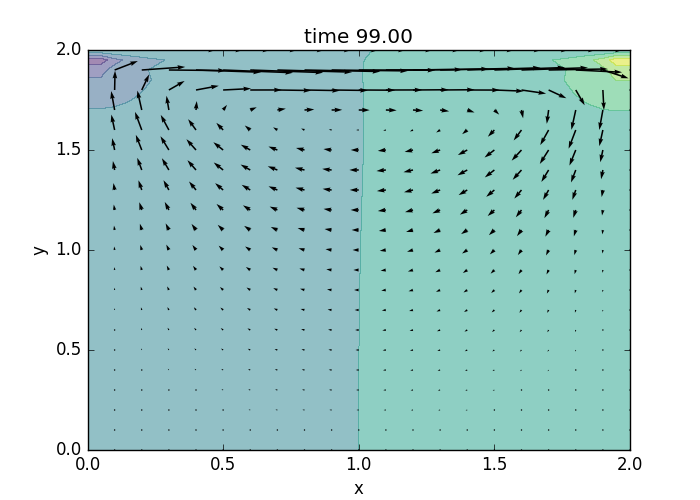

/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6442: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


In [16]:
navstokes2D(2, 2, 41, 41, 100)